# Mentoría DiploDatos 2026 - Clasificación de Clientes Masivos según su Comportamiento de Reclamos en Telecomunicaciones


### Introduccion

El proyecto consiste en desarrollar un modelo de clasificación de clientes para una empresa del sector de telecomunicaciones a partir de la información de sus reclamos, con el objetivo de identificar patrones en común sobre el servicio y definir estrategias de acción personalizadas para cada grupo, generando así valor comercial y fortaleciendo la toma de decisiones de negocio.

La iniciativa demuestra el valor de la clusterización y de los modelos no supervisados como herramientas fundamentales para comprender en profundidad el comportamiento y las necesidades de los usuarios. A partir de los segmentos generados, es posible planificar acciones concretas orientadas a mejorar la fidelización, impulsar ventas cruzadas y diseñar estrategias de retención más efectivas.

Es importante recordar que no todos los clientes son iguales. Aprovechar los datos de manera inteligente permite ofrecer experiencias más personalizadas, relevantes y satisfactorias, fortaleciendo la relación con cada uno de ellos.

### Inicializacion del entorno

In [1]:
!pip install pandas 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install sqlalchemy


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install cx_Oracle


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Importación de librerías
import numpy as np
import pandas as pd

import itertools
import warnings
warnings.filterwarnings("ignore")
import io

# Para visualización
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.figure_factory import create_table
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de aprendizaje automático
from sklearn.cluster import KMeans, MeanShift, DBSCAN 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Librerías estadísticas y matemáticas
from scipy.stats import t
from scipy import stats
from math import pi

In [10]:
#Carga de datos
ruta = r"Dataset_reclamos.csv"

df = pd.read_csv(
    ruta,
    sep=";",                # separador de columnas
    quotechar='"',          # texto entre comillas
    engine="python",        # parser más tolerante
    encoding="utf-8-sig",   # prueba 1 de codificación
    on_bad_lines="skip",    # salta filas corruptas (pandas >= 1.3)
    dtype=str               # lee todo como texto (evita errores de tipos)
)

print(df.shape)

(1809697, 30)


### Exploracion inicial del dataset

In [11]:
#Vemos el tamaño del dataset y los descriptivos
print(df.shape)
print(df.describe())

(1809697, 30)
          TPF_ID  SERVICIO   TPF_PAIS            TPF_FECHA TPF_PLAZA  \
count    1809697   1809697    1809697              1809697   1792900   
unique   1809697         5          2              1722600        62   
top     12186710  Internet  Argentina  29/10/2025 10:52:49   CORDOBA   
freq           1   1224526    1663725                    5    233295   

       TPF_LOCALIDAD TPF_MODELO_ONT TPF_VEL_CONTRATADA TPF_SOFT_VERSION  \
count        1793624        1807748            1807748          1411529   
unique           311             20                 11               43   
top          CORDOBA    HG8145X6-10             100 Mb    V5R020C00S448   
freq          233076         551538             793665           485239   

           TPF_FECHA_ACTIVA  ...                       TPF_CORTE_ONT_UPTIME  \
count               1807748  ...                                    1522744   
unique               943799  ...                                    1087215   
top     27/0

In [12]:
#Vemos el contenido del dataset
df.head()

,TPF_ID,SERVICIO,TPF_PAIS,TPF_FECHA,TPF_PLAZA,TPF_LOCALIDAD,TPF_MODELO_ONT,TPF_VEL_CONTRATADA,TPF_SOFT_VERSION,TPF_FECHA_ACTIVA,...,TPF_CORTE_ONT_UPTIME,TPF_ESTADO_GPON_CAT,TPF_CORTE_ONT_CAT,TPF_CODIF_TIPO_CAT,TPF_TECNO_CAT5,TPF_SERV_CAT8,TPF_PROB_CAT,TPF_CIERRE_CAT,DURACION_CORTE_EN_HORAS,ANTIGUEDAD_CLIENTE_ANIOS
0,15157760,Internet,Argentina,30/12/2025 23:57:31,SAN MIGUEL DE TUCUMAN,SAN MIGUEL DE TUCUMAN,HG8245W5-6T,100 Mb,V5R020C00S448,06/10/2022 20:13:54,...,26/12/2025 18:48:18,Down,Pérdida de sincronismo / señal,Cliente,Internet Fijo,Telefonía / Móvil,Contenidos / Cortes / Intermitencia,AT / Visita / Coordinación,"99,91","3,23"
1,15157759,Otros,Argentina,30/12/2025 23:57:27,ROSARIO,ROSARIO,ZTE ZXV10-B866V2,100 Mb,NaN,11/07/2022 12:33:38,...,24/12/2025 00:59:11,Up,Corte energético,Cliente,TV/OTT,STB / Deco,Plataforma / Apps / Streaming,Solucionado,NaN,"3,47"
2,15157758,Internet,Paraguay,30/12/2025 23:56:22,LUQUE,LUQUE,HG8145X6-10,100 Mb,V5R022C10S342,22/04/2024 13:49:51,...,30/12/2025 23:37:32,Up,Corte energético,Cliente,Internet Fijo,Internet Fijo / Acceso,Contenidos / Cortes / Intermitencia,AT / Visita / Coordinación,"0,03","1,69"
3,15157757,Internet,Argentina,30/12/2025 23:55:34,VICENTE LOPEZ,FLORIDA,F6600PV9.0,100 Mb,V5R020C00S422,14/06/2018 12:10:19,...,"Momentaneamente, no se reporta este valor",Up,Señalización / Protocolos,Cliente,Internet Fijo,Cliente / Administrativo,Pagos / Cobranza,Escalamiento / Derivación,NaN,"7,55"
4,15157756,Internet,Argentina,30/12/2025 23:55:32,SANTA FE,SANTA FE,HG8245W5,100 Mb,V5R020C00S422,12/02/2020 11:08:58,...,30/12/2025 03:21:53,Down,Pérdida de sincronismo / señal,Cliente,Internet Fijo,Telefonía / Móvil,Contenidos / Cortes / Intermitencia,AT / Visita / Coordinación,"10,14","5,88"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809697 entries, 0 to 1809696
Data columns (total 30 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   TPF_ID                    object
 1   SERVICIO                  object
 2   TPF_PAIS                  object
 3   TPF_FECHA                 object
 4   TPF_PLAZA                 object
 5   TPF_LOCALIDAD             object
 6   TPF_MODELO_ONT            object
 7   TPF_VEL_CONTRATADA        object
 8   TPF_SOFT_VERSION          object
 9   TPF_FECHA_ACTIVA          object
 10  TPF_BAND_STERING_WIFI     object
 11  TPF_ACTIVAR_WIFI          object
 12  TPF_REPETIDOR_WIFI        object
 13  TPF_CANT_REPE_WIFI        object
 14  TPF_POTENCIA_TX_GPON      object
 15  TPF_POTENCIA_RX_GPON      object
 16  TPF_OLT_GPON              object
 17  TPF_OLT_POTENCIA_TX       object
 18  TPF_OLT_POTENCIA_RX       object
 19  TPF_CORTE_ONT_LASTDW      object
 20  TPF_CORTE_ONT_UPTIME      object
 21  TPF_ESTA

In [14]:
#Listamos las variables para ver cuales son interesantes
print(len(df.columns), 'variables')
print(df.columns)

30 variables
Index(['TPF_ID', 'SERVICIO', 'TPF_PAIS', 'TPF_FECHA', 'TPF_PLAZA',
       'TPF_LOCALIDAD', 'TPF_MODELO_ONT', 'TPF_VEL_CONTRATADA',
       'TPF_SOFT_VERSION', 'TPF_FECHA_ACTIVA', 'TPF_BAND_STERING_WIFI',
       'TPF_ACTIVAR_WIFI', 'TPF_REPETIDOR_WIFI', 'TPF_CANT_REPE_WIFI',
       'TPF_POTENCIA_TX_GPON', 'TPF_POTENCIA_RX_GPON', 'TPF_OLT_GPON',
       'TPF_OLT_POTENCIA_TX', 'TPF_OLT_POTENCIA_RX', 'TPF_CORTE_ONT_LASTDW',
       'TPF_CORTE_ONT_UPTIME', 'TPF_ESTADO_GPON_CAT', 'TPF_CORTE_ONT_CAT',
       'TPF_CODIF_TIPO_CAT', 'TPF_TECNO_CAT5', 'TPF_SERV_CAT8', 'TPF_PROB_CAT',
       'TPF_CIERRE_CAT', 'DURACION_CORTE_EN_HORAS',
       'ANTIGUEDAD_CLIENTE_ANIOS'],
      dtype='object')


In [15]:
# Verificar la cantidad de datos faltantes en cada columna
missing_values = df.isna().sum()
print("Valores Faltantes por Columna:")
print(missing_values)

Valores Faltantes por Columna:
TPF_ID                            0
SERVICIO                          0
TPF_PAIS                          0
TPF_FECHA                         0
TPF_PLAZA                     16797
TPF_LOCALIDAD                 16073
TPF_MODELO_ONT                 1949
TPF_VEL_CONTRATADA             1949
TPF_SOFT_VERSION             398168
TPF_FECHA_ACTIVA               1949
TPF_BAND_STERING_WIFI       1051892
TPF_ACTIVAR_WIFI            1051892
TPF_REPETIDOR_WIFI          1051892
TPF_CANT_REPE_WIFI          1237043
TPF_POTENCIA_TX_GPON         889453
TPF_POTENCIA_RX_GPON         889453
TPF_OLT_GPON                 464560
TPF_OLT_POTENCIA_TX          890065
TPF_OLT_POTENCIA_RX          890026
TPF_CORTE_ONT_LASTDW         286953
TPF_CORTE_ONT_UPTIME         286953
TPF_ESTADO_GPON_CAT          265446
TPF_CORTE_ONT_CAT                 0
TPF_CODIF_TIPO_CAT                0
TPF_TECNO_CAT5                    0
TPF_SERV_CAT8                     0
TPF_PROB_CAT                     

In [16]:
#Vemos el tipo de cada variable
df.dtypes

TPF_ID                      object
SERVICIO                    object
TPF_PAIS                    object
TPF_FECHA                   object
TPF_PLAZA                   object
TPF_LOCALIDAD               object
TPF_MODELO_ONT              object
TPF_VEL_CONTRATADA          object
TPF_SOFT_VERSION            object
TPF_FECHA_ACTIVA            object
TPF_BAND_STERING_WIFI       object
TPF_ACTIVAR_WIFI            object
TPF_REPETIDOR_WIFI          object
TPF_CANT_REPE_WIFI          object
TPF_POTENCIA_TX_GPON        object
TPF_POTENCIA_RX_GPON        object
TPF_OLT_GPON                object
TPF_OLT_POTENCIA_TX         object
TPF_OLT_POTENCIA_RX         object
TPF_CORTE_ONT_LASTDW        object
TPF_CORTE_ONT_UPTIME        object
TPF_ESTADO_GPON_CAT         object
TPF_CORTE_ONT_CAT           object
TPF_CODIF_TIPO_CAT          object
TPF_TECNO_CAT5              object
TPF_SERV_CAT8               object
TPF_PROB_CAT                object
TPF_CIERRE_CAT              object
DURACION_CORTE_EN_HO

### **Trabajo practico 1**: Analisis y visualizacion de los datos
Vamos a hacer un análisis básico de los datos para ver algunas estadísticas descriptivas y posibles correlaciones entre las variables.

#### Cuestiones a analizar y responder:

1. **¿Qué se observa en la distribución de las variables?**

2. **¿Qué información relevante veo en el descriptivo?**

3. **¿Los boxplot aportan información?¿Hay valores atípicos en las variables?**

4. **¿En que localidad se concentran los clientes?**

5. **¿En que plaza se concentran los reclamos?**

6. **¿Cuál es el servicio con más reclamos?**

7. **¿Cuáles son las codificaciones que más aparecen (tipo,tecnología,problema,cierre)?**

8. **¿Existe alguna correlación significativa entre variables?**

9. **¿Que se observa sobre las causas y el tiempo de corte o la característica de OLT,ONT o versión de software?**

10. **¿Clientes nuevos reclaman más (curva de onboarding) o son los históricos?**

### Detalle del dataset por feature:
El dataset tiene información de reclamos de clientes masivos de servicios de telecomunicaciones, realizados durante 2025.

- tpf_id: identificación del reclamo (es único)
- servicio: servicio de telecomunicaciones comercializado masivamente (internet, IPTV, Telefonía,Apps-Streaming,Otros)
- tpf_pais: El servicio se comercializa en Paraguay y Argentina
- tpf_fecha: detalle de día,mes,año y hora del reclamo
- tpf_plaza: localidad donde está el nodo GPON del operador
- tpf_localidad: ciudad donde está el equipo del cliente
- tpf_modelo_ont: modelo de la ONT (Terminal Óptica de Red) que es el equipo que tiene el cliente en su casa
- tpf_vel_contratada: velocidad contratada por el cliente para el servicio de datos
- tpf_soft_version: versión del software de la ONT en los clientes que hicieron el reclamo
- tpf_fecha_activa: detalle de día,mes,año y hora del alta de la ONT
- tpf_band_stering_wifi: Indica si el cliente tiene activada la función Band Steering (la ONT mueve automáticamente al cliente entre las bandas 2.4 GHz y 5 GHz de acuerdo a congestión, capacidad de señal,etc.)
- tpf_activar_wifi: Indica si la red WiFi de la ONT está activada
- tpf_repetidor_wifi: Indica si el cliente tiene repetidores WiFi vinculados a su servicio
- tpf_cant_repe_wifi:si el cliente que reclamo tiene repetidor, indica cantidad
- tpf_potencia_tx_gpon: Es la potencia óptica que la ONT transmite hacia la OLT
- tpf_potencia_rx_gpon: Es la potencia óptica que la ONT recibe desde la OLT.Es el indicador más crítico de salud del enlace óptico
- tpf_olt_gpon: modelo de la OLT (Optical Line Terminal) que es el equipo ubicado en la central o nodo GPON del operador
- tpf_olt_potencia_tx: Es la potencia que la OLT transmite hacia la ONT
- tpf_olt_potencia_rx: Es la potencia que la OLT recibe desde la ONT
- tpf_corte_ont_lastdw: Es la fecha y hora en la que la ONT perdió señal (o dejó de responder); en ese momento se cayó.
- tpf_corte_ont_uptime: Es la última fecha y hora en la que la ONT fue vista en estado operativo previo al último evento de caída
- tpf_estado_gpon_cat: indica si el servicio GPON está Up o Down en el momento de registrarse el reclamo
- tpf_corte_ont_cat: causas del corte (energía, pérdida de sincronismo,etc)
- tpf_codif_tipo_cat: codificación del reclamo por tipo
- tpf_tecno_cat5:codificación del reclamo por tecnología (internet fijo, tv)
- tpf_serv_cat8: codificación del reclamo por servicio (telefonia,internet,STB)
- tpf_prob_cat: codificación del reclamo por tipo de problema (contenido,plataforma,pagos)
- tpf_cierre_cat: codificación de cierre (solucionado, AT)
- duracion_corte_en_horas: tiempo (en horas)desde que la ONT estuvo operativa por ultima vez y cuando se perdió señal
- antiguedad_cliente_anios: tiempo (en años) desde el alta del equipo y el reclamo

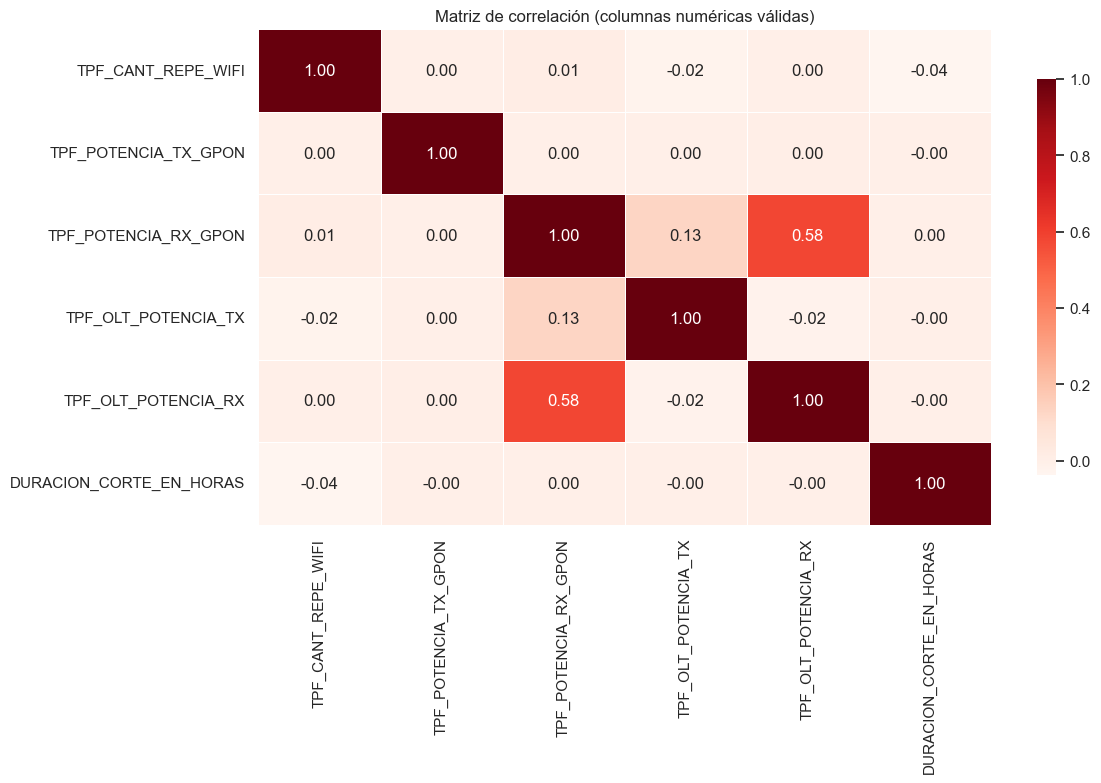

In [17]:
# Seleccionar solo las columnas numéricas

posibles_numericas = [
    'TPF_POTENCIA_TX_GPON',
    'TPF_POTENCIA_RX_GPON',
    'TPF_OLT_POTENCIA_TX',
    'TPF_OLT_POTENCIA_RX',
    'DURACION_CORTE_EN_HORAS',
    'ANTIGUEDAD_CLIENTE_AÑOS',
    'TPF_CANT_REPE_WIFI'
]

presentes = [c for c in posibles_numericas if c in df.columns]


for c in presentes:
    df[c] = (
        df[c]
        .astype(str)
        .str.strip()
        .str.replace(',', '.', regex=False)  # 99,91 -> 99.91
        .replace({
            '': np.nan,
            'None': np.nan,
            'NaN': np.nan,
            'nan': np.nan,
            'Momentaneamente, no se reporta este valor': np.nan
        })
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Construir numeric_df (después de convertir)
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Matriz de correlación (pairwise complete obs por defecto)
if numeric_df.empty:
    print("⚠️ No hay columnas numéricas válidas para correlación (todas NaN o constantes).")
else:
    corr = numeric_df.corr()

    if corr.empty:
        print("⚠️ La matriz de correlación está vacía (sin pares con datos suficientes).")
    else:
        # 6) Graficar el heatmap
        sns.set(rc={'figure.figsize': (12, 8)})
        ax = sns.heatmap(
            corr,
            cmap="Reds",
            annot=True,
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'shrink': 0.8}
        )
        ax.set_title("Matriz de correlación (columnas numéricas válidas)")
        plt.tight_layout()
        plt.show()
#Agregar los graficos que les resulten utiles para visualizacion

### Conclusiones y Observaciones 